In [39]:
from Programacion import ModeloArima
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings

In [40]:
Datos = pd.read_csv('../Alemania_Reducida.csv')

In [41]:
Datos.columns.values

array(['2', 'Exportaciones de mercaderías (US$ a precios actuales)',
       'Población urbana (% del total)',
       'Población, hombres (% del total)', 'Población, total',
       'Tasa de inactividad por edades, personas menores de 15 años (% de la población en edad de trabajar)',
       'Población de 80\xa0años en adelante, varones (% de la población masculina)',
       'Población de 70 a 74\xa0años, varones (% de la población masculina)',
       'Población de 65 años de edad y más, hombres (% del total)',
       'Población de 65 a 69\xa0años, varones (% de la población masculina)',
       'Población de 55 a 59\xa0años, varones (% de la población masculina)',
       'Población de 45 a 49\xa0años, varones (% de la población masculina)',
       'Población de 35 a 39\xa0años, varones (% de la población masculina)',
       'Población de 25 a 29\xa0años, varones (% de la población masculina)',
       'Población entre 15 y 64 años de edad (% del total)',
       'Población entre 15 y 64 año

In [42]:
Trabajable = Datos['Población en aglomerados urbanos de más de 1 millón de personas']

In [43]:
Modelo = ModeloArima(Trabajable)

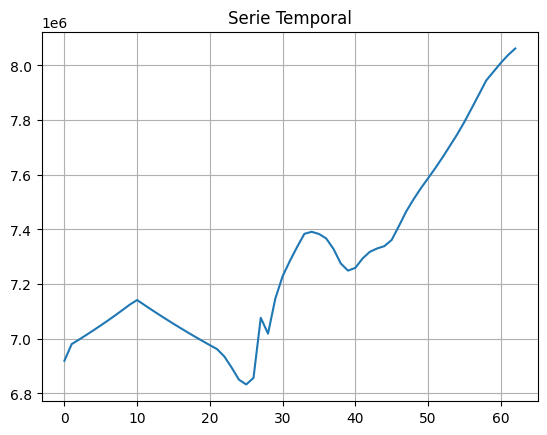

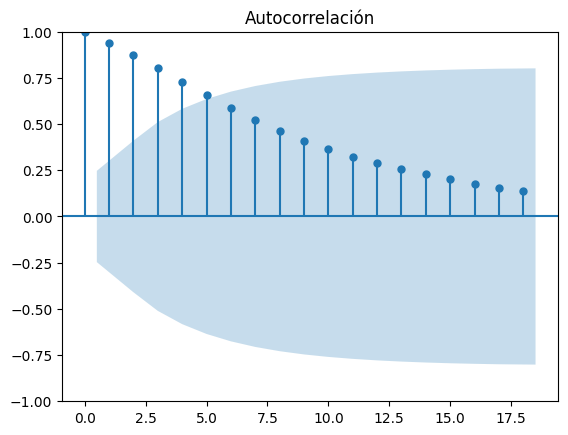

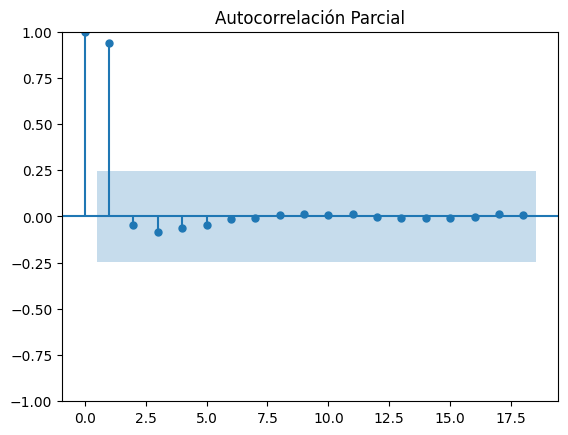

In [44]:
Modelo.Graficos()

In [45]:
import subprocess
warnings.filterwarnings('ignore')
Modelo.Pruebatoolkit(5)
warnings.resetwarnings()

Mejor orden encontrado: (3, 0, 0) con AIC: 1525.9665564555444


In [48]:
warnings.filterwarnings('ignore')
Modelo.ModeloARMA(3,0)
warnings.resetwarnings()

In [49]:
print(Modelo.summary)

                                                      SARIMAX Results                                                      
Dep. Variable:     Población en aglomerados urbanos de más de 1 millón de personas   No. Observations:                   63
Model:                                                              ARIMA(3, 0, 0)   Log Likelihood                -757.983
Date:                                                             Thu, 23 Nov 2023   AIC                           1525.967
Time:                                                                     10:25:42   BIC                           1536.682
Sample:                                                                          0   HQIC                          1530.181
                                                                              - 63                                         
Covariance Type:                                                               opg                                         
        